In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LassoCV,RidgeCV,ElasticNetCV


### Loading Data

In [220]:
df=pd.read_csv("fire_data.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Cleaning Process

In [221]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [222]:
df[df["Rain "].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
df.drop(index=122,inplace=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [224]:
df.iloc[123:123]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [225]:
df.drop(index=123,inplace=True)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


In [227]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [228]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [229]:
df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']]=df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4    RH          244 non-null    int64 
 5    Ws          244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: int64(6), object(8)
memory usage: 28.6+ KB


In [230]:
for i in df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]:
    for j in df[i]:
        if j == '14.6 9':
            print(df[df[i]=='14.6 9'])

     day  month  year  Temperature   RH   Ws Rain   FFMC   DMC      DC   ISI  \
167   14      7  2012           37   37   18   0.2  88.9  12.9  14.6 9  12.5   

      BUI      FWI Classes    
167  10.4  fire          NaN  


In [231]:
df.replace('14.6 9','14.69',inplace=True)

In [232]:
df["FWI"].replace("fire   ",np.nan,inplace=True)


/var/folders/fd/8tdnkj3174527d_qmx175ff80000gn/T/ipykernel_9280/419490472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FWI"].replace("fire   ",np.nan,inplace=True)


In [233]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [234]:
df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 28.6+ KB


In [235]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
dtype: int64

In [236]:
#handling missing values
df["Classes  "].fillna(df["Classes  "].mode()[0],inplace=True)
df["FWI"].fillna(df["FWI"].mean(),inplace=True)

/var/folders/fd/8tdnkj3174527d_qmx175ff80000gn/T/ipykernel_9280/2946145996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Classes  "].fillna(df["Classes  "].mode()[0],inplace=True)
/var/folders/fd/8tdnkj3174527d_qmx175ff80000gn/T/ipykernel_9280/2946145996.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [237]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [238]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [239]:
#encoding
df["Classes  "]=np.where(df["Classes  "].str.contains("not fire"),0,1)

In [240]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


### Removed the column name extra spaces

In [247]:
df.columns=[i.strip() for i in df.columns]

In [248]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [249]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [304]:
df.to_csv("fire_data_cleaned.csv",index=False)

### EDA

In [294]:
dff=df.copy()

In [257]:
dff.drop(["day","month","year"],axis=1,inplace=True)
dff.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [295]:
dff["Classes"].replace(to_replace=[0,1],value=["Not Fire","Fire"],inplace=True)


/var/folders/fd/8tdnkj3174527d_qmx175ff80000gn/T/ipykernel_9280/3677363133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff["Classes"].replace(to_replace=[0,1],value=["Not Fire","Fire"],inplace=True)


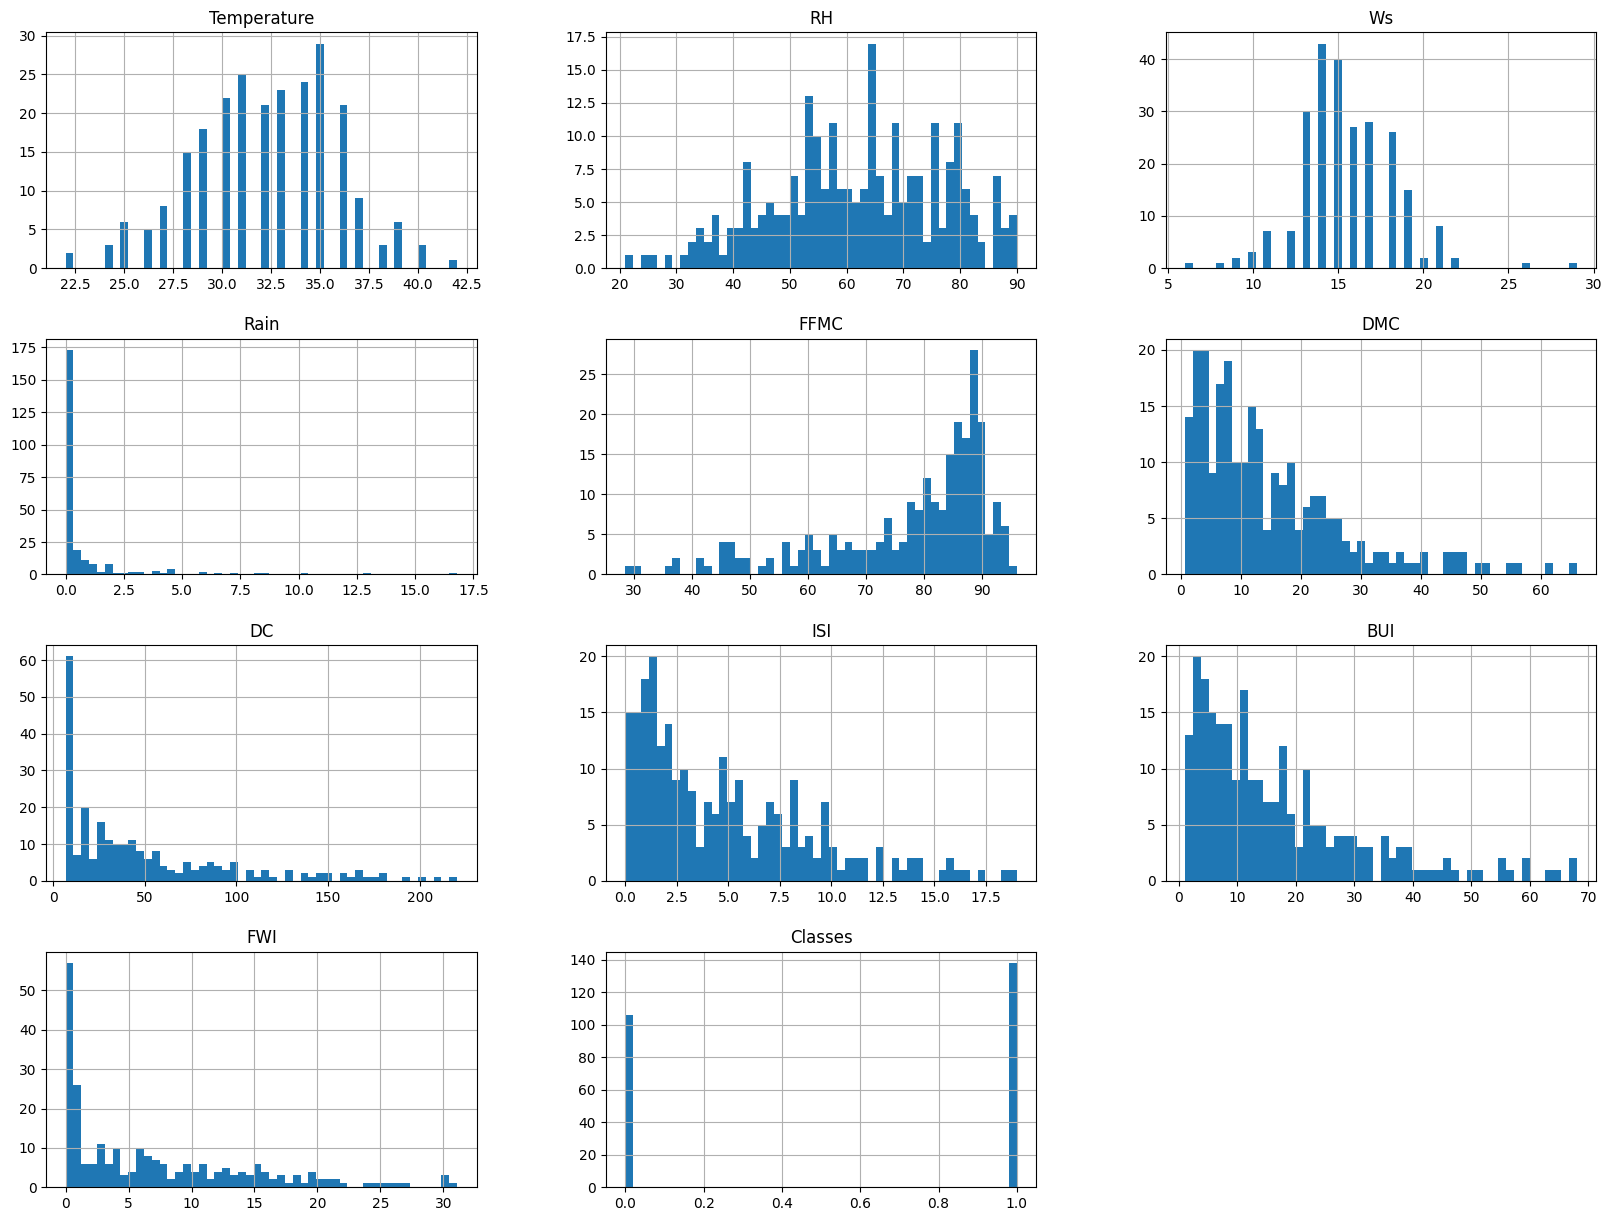

In [262]:
dff.hist(bins=50,figsize=(20,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

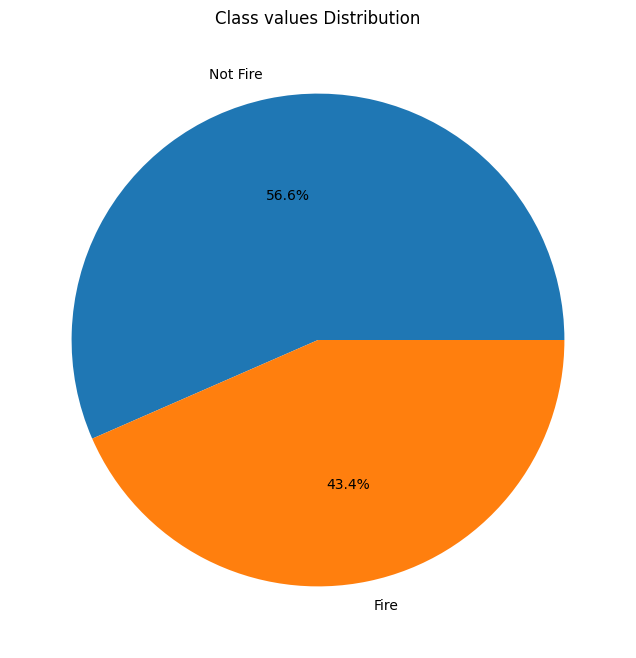

In [266]:
plt.figure(figsize=(10,8))
plt.pie(df["Classes"].value_counts(),labels=["Not Fire","Fire"],autopct="%1.1f%%")
plt.title("Class values Distribution")
plt.show

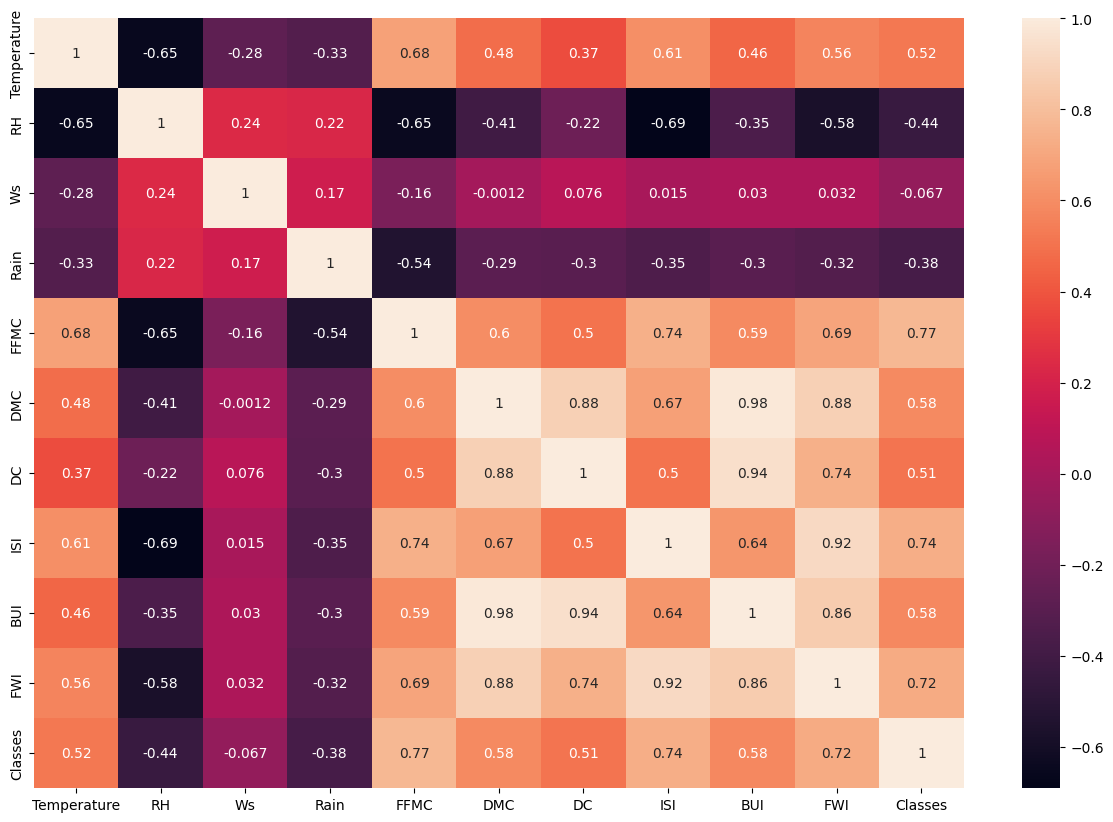

In [274]:
plt.figure(figsize=(15,10))
sns.heatmap(dff.corr(),annot=True)
plt.show()

<Axes: xlabel='month', ylabel='count'>

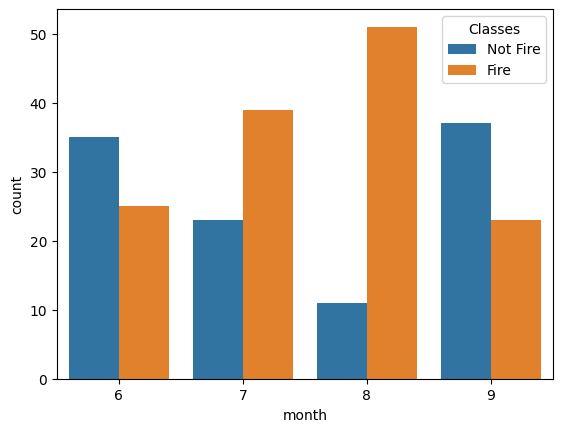

In [297]:
sns.countplot(data=dff,x="month",hue="Classes",legend="full")

### Feature Selection

In [305]:
df_clean=pd.read_csv("fire_data_cleaned.csv")

In [306]:
df_clean.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [308]:
df_clean.drop(['day',"month","year"],axis=1,inplace=True)

In [309]:
df_clean.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [310]:
data=df_clean.corr()
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.564599,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.577577,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.032315,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.324369,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.690289,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875827,0.584188
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.738714,0.507132
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.916343,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857628,0.583882
FWI,0.564599,-0.577577,0.032315,-0.324369,0.690289,0.875827,0.738714,0.916343,0.857628,1.000000,0.718079


In [473]:

for i in data:
    print([i],[set(data[(data[i]>.85) & (data[i]<1)].index)])

['Temperature'] [set()]
['RH'] [set()]
['Ws'] [set()]
['Rain'] [set()]
['FFMC'] [set()]
['DMC'] [{'DC', 'FWI', 'BUI'}]
['DC'] [{'DMC', 'BUI'}]
['ISI'] [{'FWI'}]
['BUI'] [{'DMC', 'DC', 'FWI'}]
['FWI'] [{'DMC', 'ISI', 'BUI'}]
['Classes'] [set()]


In [465]:
df_clean.drop("BUI",inplace=True,axis=1)


In [474]:
df_clean.drop("DC",inplace=True,axis=1)

In [475]:
df_clean.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0


In [479]:
x=df_clean.drop("FWI",axis=1)
y=df_clean["FWI"]

### spliting and normalizing the data

In [481]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
x_train.shape

(195, 8)

In [483]:
st=StandardScaler()
x_train_scaled=st.fit_transform(x_train)
x_test_scaled=st.transform(x_test)

### Model building

#### 1. Linear Regression

MSE: 0.4800778380167599
R2 Score: 0.9876827193528638


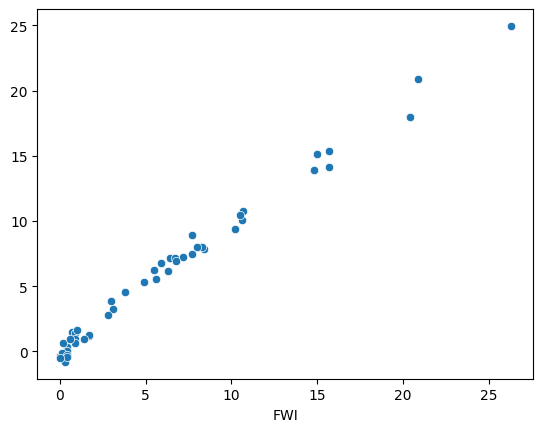

In [488]:
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pre=lr.predict(x_test_scaled)
print("MSE:",mean_squared_error(y_test,y_pre))
print("R2 Score:",r2_score(y_test,y_pre))
sns.scatterplot(x=y_test,y=y_pre)
plt.show()

#### 2. Ridge Regression

MSE: 0.5116642726726446
R2 Score: 0.98687231122841


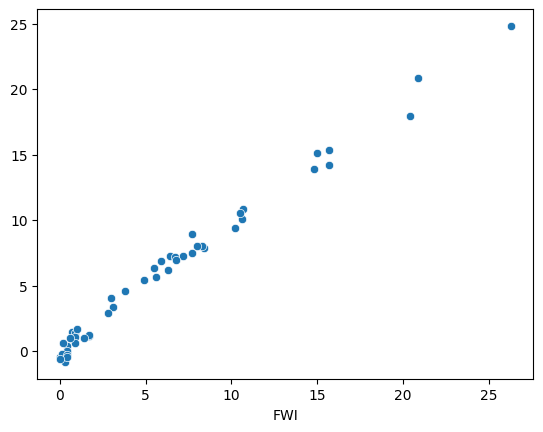

In [489]:
rr=Ridge()
rr.fit(x_train_scaled,y_train)
y_pre=rr.predict(x_test_scaled)
print("MSE:",mean_squared_error(y_test,y_pre))
print("R2 Score:",r2_score(y_test,y_pre))
sns.scatterplot(x=y_test,y=y_pre)
plt.show()

#### 4. Lasso

MSE: 1.804246756787942
R2 Score: 0.9537087282515494


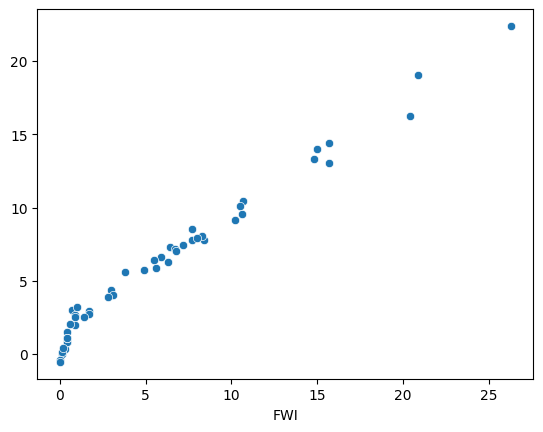

In [490]:
lassor=Lasso()
lassor.fit(x_train_scaled,y_train)
y_pre=lassor.predict(x_test_scaled)
print("MSE:",mean_squared_error(y_test,y_pre))
print("R2 Score:",r2_score(y_test,y_pre))
sns.scatterplot(x=y_test,y=y_pre)
plt.show()

### Hyperparameter Tuning

#### 1. LassoCV

MSE: 0.5112430835492119
R2 Score: 0.9868831176106839
LassoCV(cv=5)


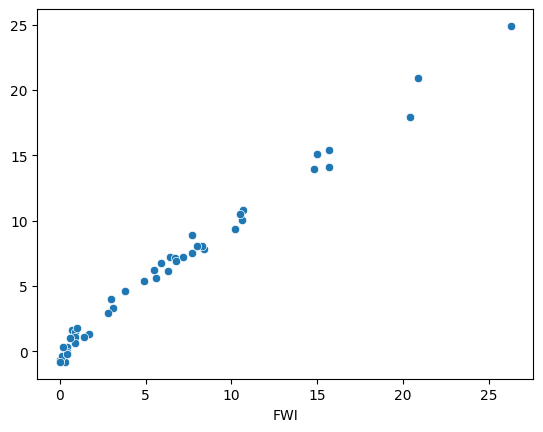

In [494]:
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)
y_pre=lassocv.predict(x_test_scaled)
print("MSE:",mean_squared_error(y_test,y_pre))
print("R2 Score:",r2_score(y_test,y_pre))
print(lassocv)
sns.scatterplot(x=y_test,y=y_pre)
plt.show()

#### 2. ElasticNetCV

MSE: 0.5260177000319132
R2 Score: 0.9865040476281515
ElasticNetCV()


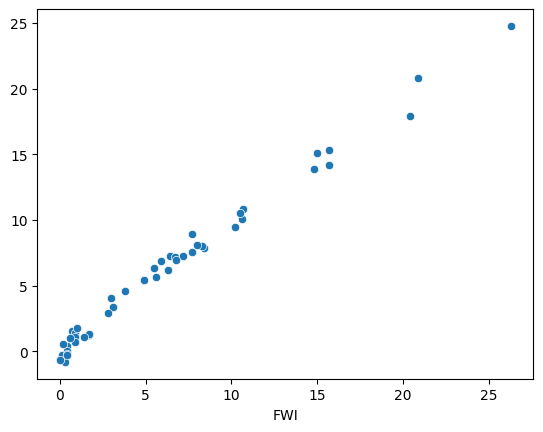

In [495]:
ecv=ElasticNetCV()
ecv.fit(x_train_scaled,y_train)
y_pre=ecv.predict(x_test_scaled)
print("MSE:",mean_squared_error(y_test,y_pre))
print("R2 Score:",r2_score(y_test,y_pre))
print(ecv)
sns.scatterplot(x=y_test,y=y_pre)
plt.show()

MSE: 0.5116642726725577
R2 Score: 0.9868723112284122
ElasticNetCV()


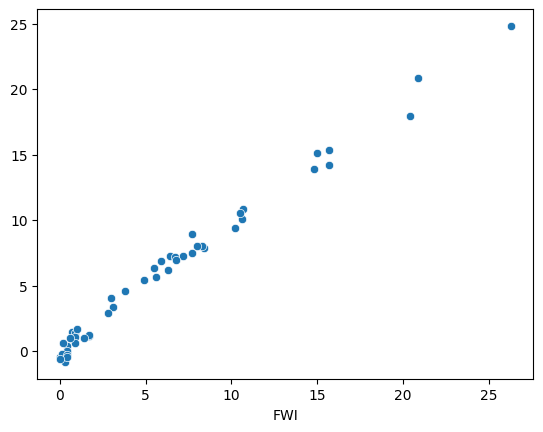

In [496]:
rcv=RidgeCV()
rcv.fit(x_train_scaled,y_train)
y_pre=rcv.predict(x_test_scaled)
print("MSE:",mean_squared_error(y_test,y_pre))
print("R2 Score:",r2_score(y_test,y_pre))
print(ecv)
sns.scatterplot(x=y_test,y=y_pre)
plt.show()